#Simple LR Model

In [ ]:
import pandas as pd

cali_house = pd.read_csv("/content/California_Housing.csv")

In [ ]:
cali_house.shape

(20640, 10)

In [ ]:
cali_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
cali_house.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
#to simplify things, only using numerical columns
cali_house = cali_house.select_dtypes(exclude=['object'])

In [ ]:
cali_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
print(cali_house.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


In [ ]:
y = cali_house['median_house_value']

In [ ]:
X = cali_house.drop('median_house_value', axis=1)

In [ ]:
missing_value_column = [col for col in X.columns if X[col].isnull().any()]

In [ ]:
missing_value_column

['total_bedrooms']

In [ ]:
reduced_X = X.drop(missing_value_column, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(reduced_X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_valid)

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_valid, pred)
mse = mean_squared_error(y_valid, pred)
rmse = np.sqrt(mse)
print("After removing total_bedrooms columns: ",mae)
print("After removing total_bedrooms columns: ",mse)
print("After removing total_bedrooms columns: ",rmse)

After removing total_bedrooms columns:  51480.709122366614
After removing total_bedrooms columns:  4937810005.84005
After removing total_bedrooms columns:  70269.55248071565


In [ ]:
X = cali_house.drop('median_house_value', axis=1)

y = cali_house['median_house_value']

In [ ]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [ ]:
y.describe()

,median_house_value
count,20640.000000
mean,206855.816909
std,115395.615874
min,14999.000000
25%,119600.000000
50%,179700.000000
75%,264725.000000
max,500001.000000


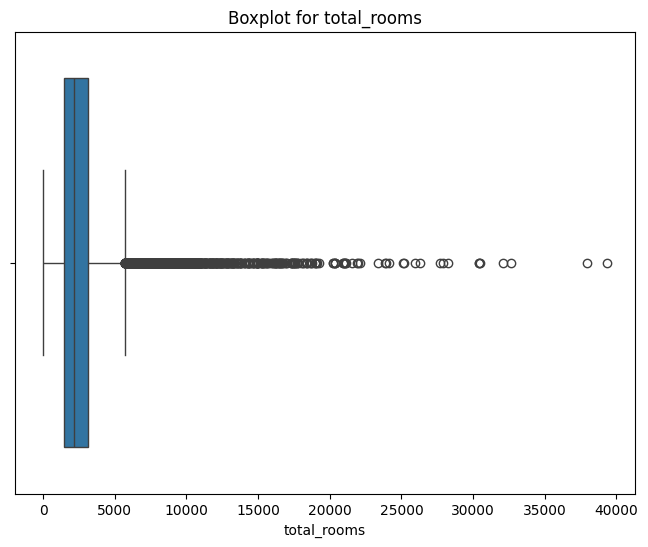

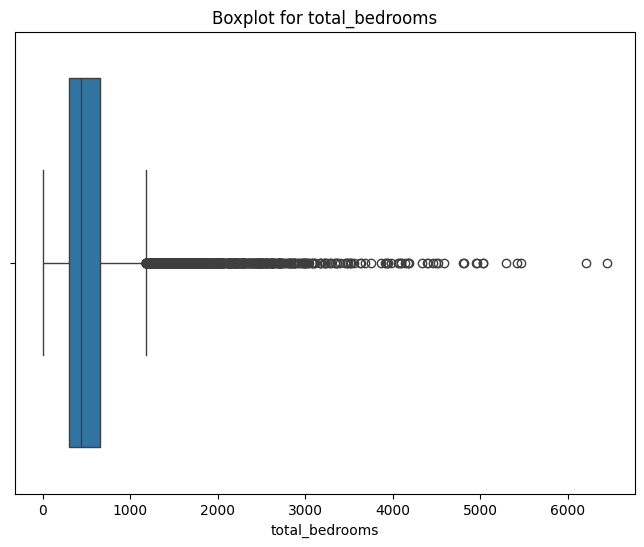

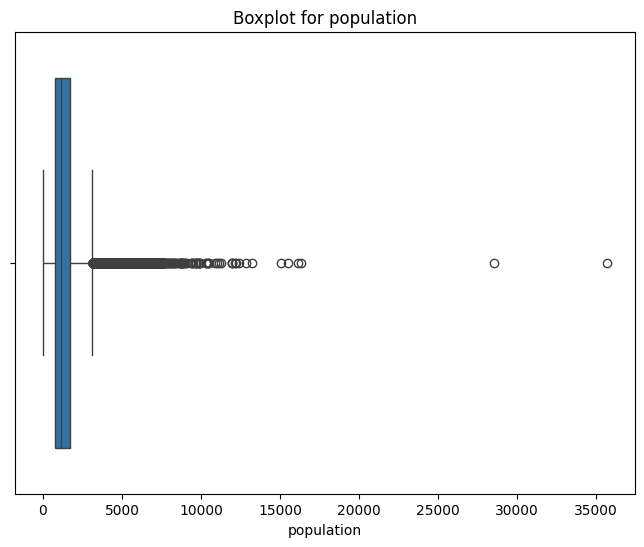

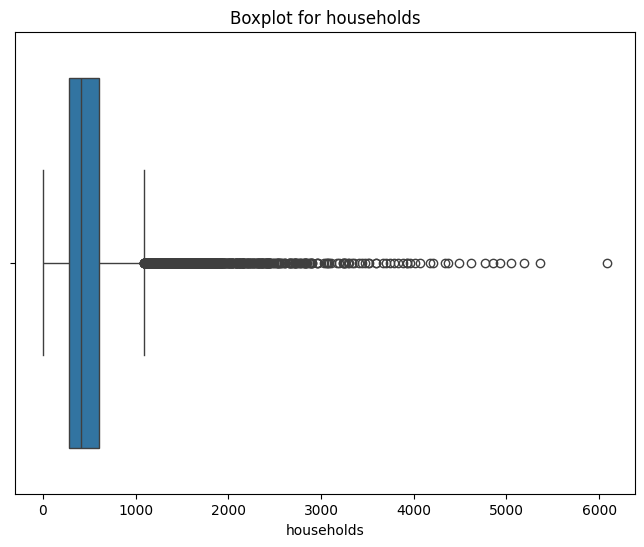

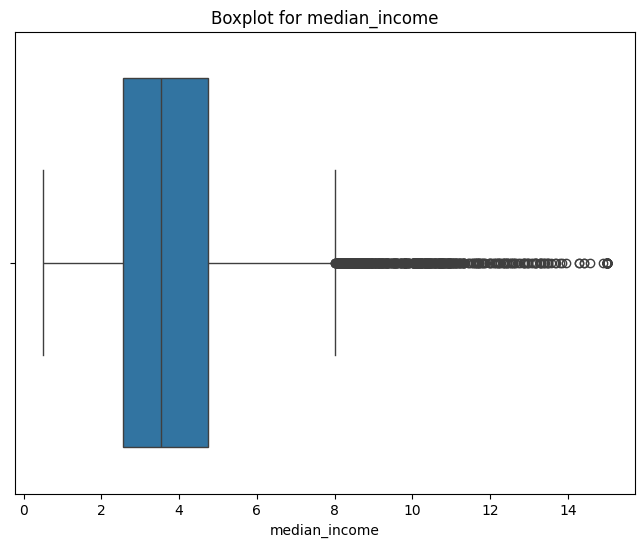

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

for col in columns_to_check:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cali_house[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
Q1 = cali_house[columns_to_check].quantile(0.25)
Q3 = cali_house[columns_to_check].quantile(0.75)
IQR = Q3 - Q1
outliers = ((cali_house[columns_to_check] < (Q1 - 1.5 * IQR)) | (cali_house[columns_to_check] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

total_rooms       1287
total_bedrooms    1271
population        1196
households        1220
median_income      681
dtype: int64


In [ ]:
#to impute NaN values in total_bedrooms columns
from sklearn.impute import SimpleImputer

my_imput = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imput.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imput.transform(X_valid))

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(imputed_X_train, y_train)

pred = model.predict(imputed_X_valid)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_valid, pred)

print("This is after imputing ",mae)

This is after imputing  51480.709122366614


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_valid, pred)
rmse = np.sqrt(mse)

print("This is after imputing ",mse)
print("This is after imputing ",rmse)

This is after imputing  4937810005.84005
This is after imputing  70269.55248071565


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, pred)
print("This is after imputing ",r2)

This is after imputing  0.6213204922137673


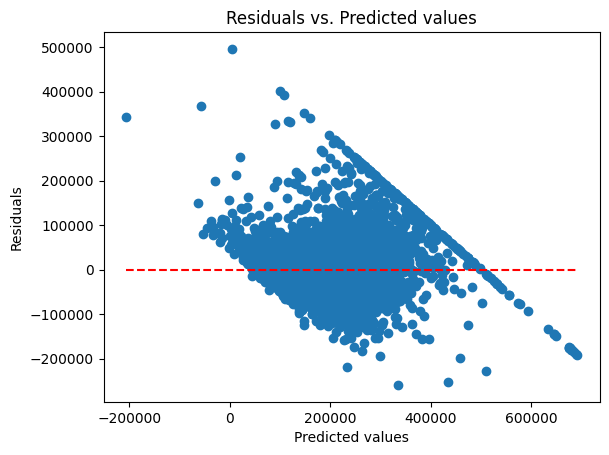

In [ ]:
import matplotlib.pyplot as plt

residuals = y_valid - pred

plt.scatter(pred, residuals)
plt.hlines(0, min(pred), max(pred), colors='r', linestyles='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted values')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf.fit(imputed_X_train, y_train)
pred_rf = rf.predict(imputed_X_valid)

mae_rf = mean_absolute_error(y_valid, pred_rf)
print("MAE with Random Forest:", mae_rf)

MAE with Random Forest: 32095.859951550385


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_valid, pred_rf)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


from sklearn.metrics import r2_score

r2 = r2_score(y_valid, pred_rf)
print(f"R-squared: {r2}")

MSE: 2392090974.1256948
RMSE: 48909.00708587013
R-squared: 0.8165510962166512


# Building from Scratch - House Price Prediction using California Housing dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
cali_house = pd.read_csv("/content/California_Housing.csv")

In [ ]:
cali_house.shape

(20640, 10)

In [ ]:
cali_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
cali_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#to-ensure there are no spaces
cali_house['ocean_proximity'] = cali_house['ocean_proximity'].str.strip()
print(cali_house['ocean_proximity'].unique())
#now to encode ocean-proximity
cali_house_encoded = pd.get_dummies(cali_house, columns=['ocean_proximity'], drop_first=True)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
cali_house_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [ ]:
cali_house_encoded.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_INLAND,0


In [ ]:
#now to use median values to impute the missing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
cali_house_encoded['total_bedrooms'] = imputer.fit_transform(cali_house_encoded[['total_bedrooms']])

# Verify if missing values are filled
print(cali_house_encoded['total_bedrooms'].isnull().sum())

0


In [ ]:
#check for outliers using statistics
cali_house_encoded.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cali_house_encoded[['total_rooms', 'total_bedrooms', 'population', 'households']] = scaler.fit_transform(cali_house_encoded[['total_rooms', 'total_bedrooms', 'population', 'households']])

In [ ]:
y = cali_house_encoded['median_house_value']

In [ ]:
X = cali_house_encoded.drop('median_house_value', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_valid)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_valid, pred)
mse = mean_squared_error(y_valid, pred)
rmse = np.sqrt(mse)
print("Build from Scratch - MAE:",mae)
print("Build from Scratch - MSE:",mse)
print("Build from Scratch - RMSE:",rmse)

Build from Scratch - MAE: 49707.427993599515
Build from Scratch - MSE: 4719192088.227015
Build from Scratch - RMSE: 68696.37609238943


# Building from Scratch - Take 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
house = pd.read_csv("/content/California_Housing.csv")

In [ ]:
house.shape

(20640, 10)

In [ ]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
house.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
y = house['median_house_value']

In [ ]:
X = house.drop('median_house_value', axis=1)

In [ ]:
#Splitting of dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
#stripping of whitespaces from categorical column - ocean_proximity
house['ocean_proximity'] = house['ocean_proximity'].str.strip()

In [ ]:
#pre-processing for categorical column - ocean proximity
X_train_encoded = pd.get_dummies(X_train, columns=['ocean_proximity'], drop_first=True)

In [ ]:
#pre-processing on numerical column
imputer = SimpleImputer(strategy='median')
X_train_encoded['total_bedrooms'] = imputer.fit_transform(X_train_encoded[['total_bedrooms']])

In [ ]:
# One-hot encoding for ocean_proximity (using the same encoding from training set)
X_valid_encoded = pd.get_dummies(X_valid, columns=['ocean_proximity'], drop_first=True)

# Impute missing values (using the same imputer trained on the training set)
X_valid_encoded['total_bedrooms'] = imputer.transform(X_valid_encoded[['total_bedrooms']])

# Standardize the data (fit on the training set and apply to validation)
scaler = StandardScaler()
X_train_encoded[['total_rooms', 'total_bedrooms', 'population', 'households']] = scaler.fit_transform(X_train_encoded[['total_rooms', 'total_bedrooms', 'population', 'households']])
X_valid_encoded[['total_rooms', 'total_bedrooms', 'population', 'households']] = scaler.transform(X_valid_encoded[['total_rooms', 'total_bedrooms', 'population', 'households']])

In [ ]:
#model building
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [ ]:
#evaluating the model
prediction = model.predict(X_valid_encoded)

In [ ]:
#checking the metrics
mae = mean_absolute_error(prediction, y_valid)
mse = mean_squared_error(prediction, y_valid)
rmse = np.sqrt(mse)

In [ ]:
print(mae)
print(mse)
print(rmse)

57236238.55427068
5355802836665216.0
73183350.81605116


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model on the training data
rf_model.fit(X_train_encoded, y_train)

# Make predictions
rf_pred = rf_model.predict(X_valid_encoded)

# Evaluate the Random Forest model
rf_mae = mean_absolute_error(y_valid, rf_pred)
rf_mse = mean_squared_error(y_valid, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest - MAE:", rf_mae)
print("Random Forest - MSE:", rf_mse)
print("Random Forest - RMSE:", rf_rmse)

Random Forest - MAE: 40192.50416424419
Random Forest - MSE: 3043928614.9566402
Random Forest - RMSE: 55171.80996629203


In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=0)

# Train the model
xgb_model.fit(X_train_encoded, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_valid_encoded)

# Evaluate the XGBoost model
xgb_mae = mean_absolute_error(y_valid, xgb_pred)
xgb_mse = mean_squared_error(y_valid, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)

print("XGBoost - MAE:", xgb_mae)
print("XGBoost - MSE:", xgb_mse)
print("XGBoost - RMSE:", xgb_rmse)

XGBoost - MAE: 41790.516334711116
XGBoost - MSE: 3450878490.2696977
XGBoost - RMSE: 58744.17835215416
